In [1]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_probability.substrates.jax.distributions as tfd
from jax import vmap
from jax.random import PRNGKey, split
import plotly.graph_objs as go
import plotly.offline as py

import numpy as np
from ipywidgets import interactive, HBox, VBox

In [2]:
mean = jnp.array([0,0])
cov = jnp.array([[1,3/5],[3/5,2]])

In [3]:
from jax import random
key = random.PRNGKey(10)
A = jax.random.multivariate_normal(key, mean, cov,shape = (100,2))

In [4]:
A

DeviceArray([[[-1.29394007e+00, -1.96652889e-01],
              [-4.84748721e-01, -6.43860579e-01]],

             [[-7.88031638e-01,  2.50639617e-01],
              [-6.57318532e-01, -1.16309035e+00]],

             [[ 4.63124782e-01,  4.79655154e-02],
              [-4.55216318e-02,  1.12329340e+00]],

             [[-3.70511800e-01, -2.03293443e-01],
              [ 3.68666559e-01,  1.29880083e+00]],

             [[-5.48583508e-01, -6.94344640e-01],
              [ 8.51704419e-01, -6.88979864e-01]],

             [[-1.72973239e+00, -4.86436307e-01],
              [ 3.22146386e-01, -3.67985606e-01]],

             [[-7.50863850e-01, -2.35194016e+00],
              [-2.39808455e-01, -5.25780797e-01]],

             [[-5.07546246e-01,  1.27393162e+00],
              [-6.35622442e-01,  2.10853481e+00]],

             [[ 1.20132580e-01, -5.61765075e-01],
              [ 1.07937312e+00, -4.74879533e-01]],

             [[-9.94142830e-01, -3.46685553e+00],
              [-6.39851213e-01, 

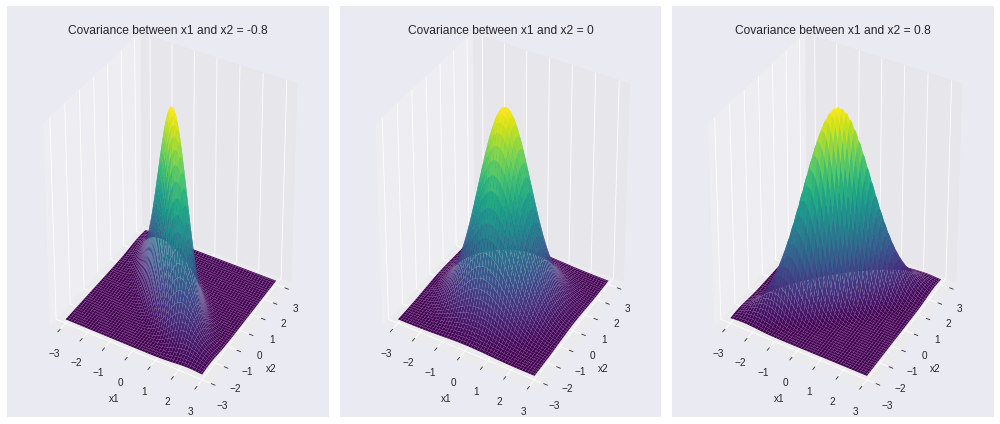

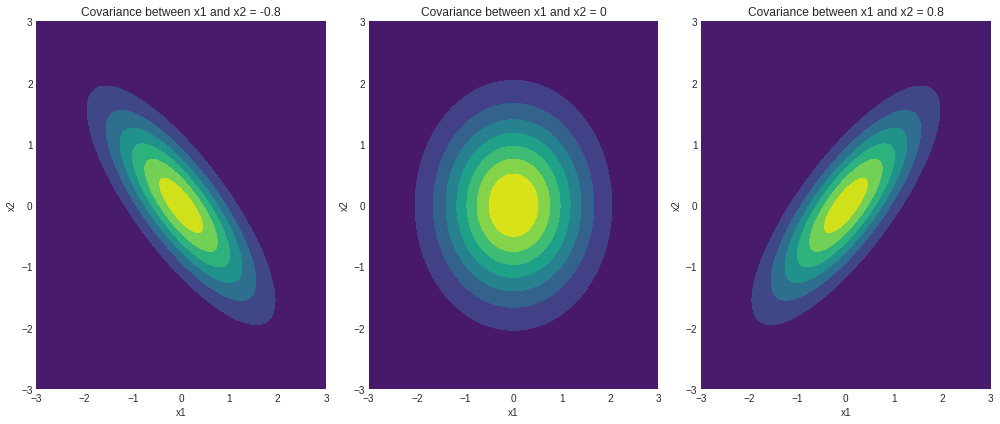

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = jnp.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
	
	# Initializing the covariance matrix
	cov = jnp.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	
	x = jnp.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = jnp.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = jnp.meshgrid(x,y)
	
	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	
	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()
